In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Pairgrid

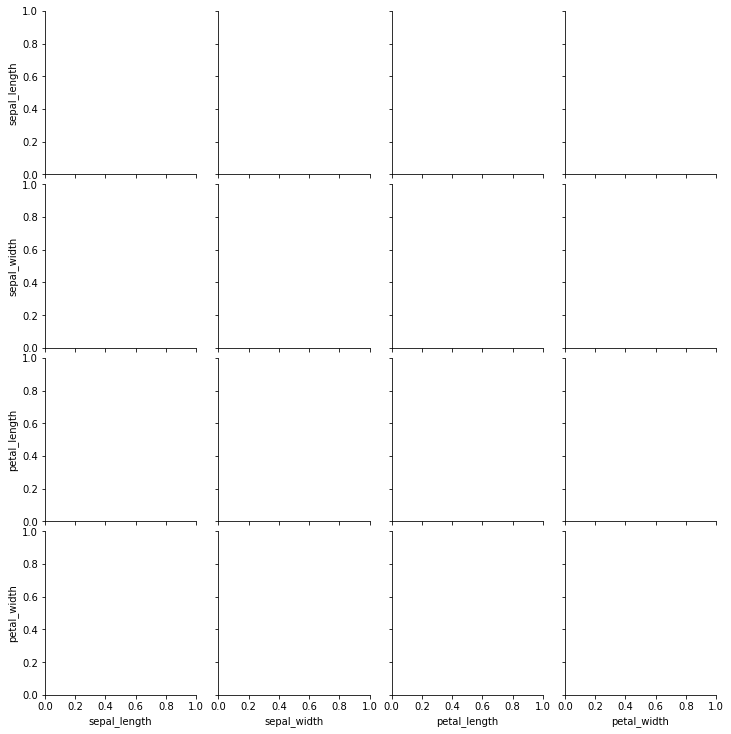

In [14]:
sns.PairGrid(iris)


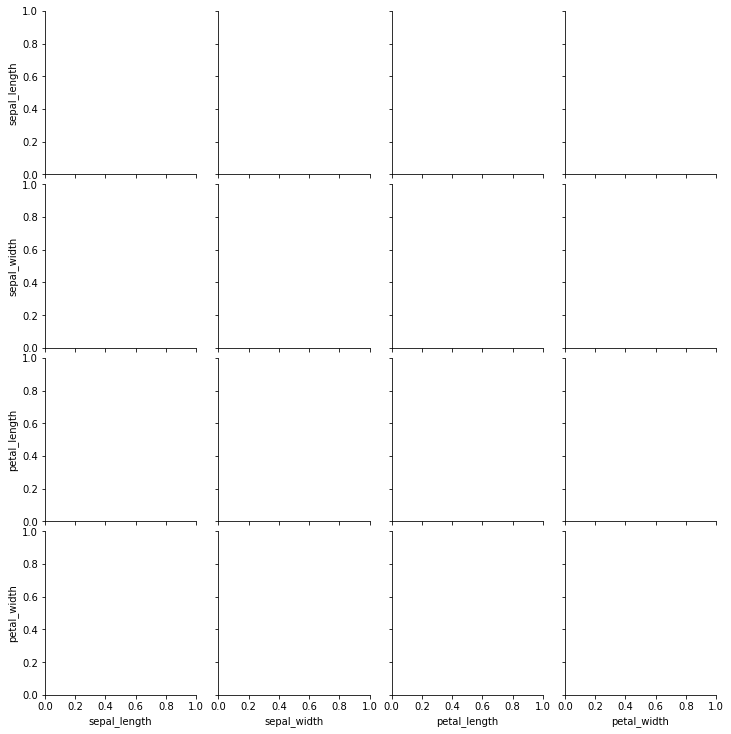

In [4]:
# Just the Grid

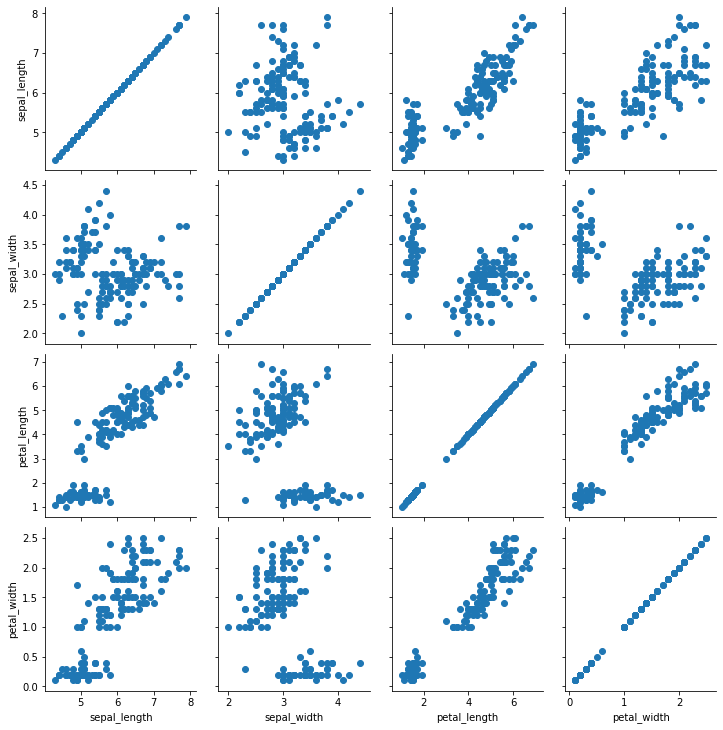

In [15]:
g = sns.PairGrid(iris) 
g = g.map(plt.scatter)

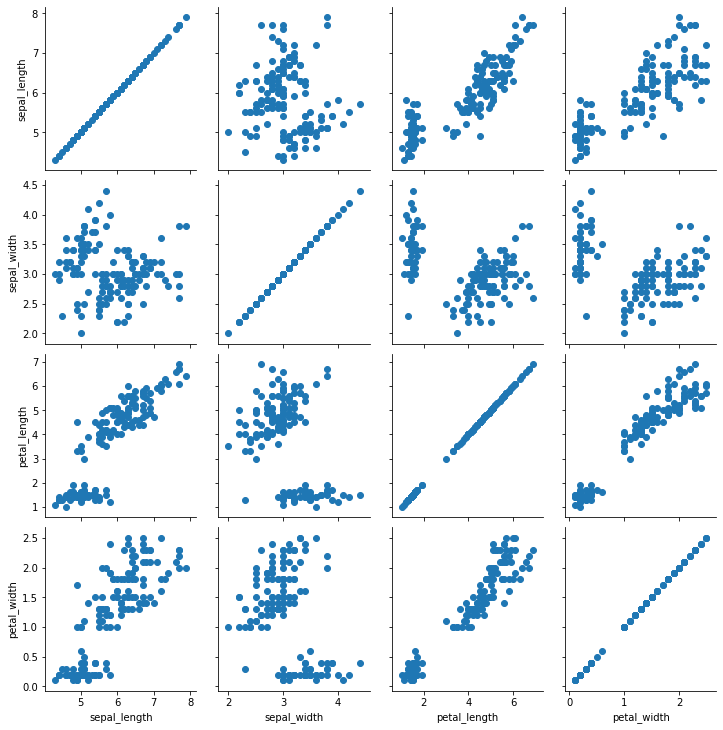

In [5]:
# Then you map to the grid

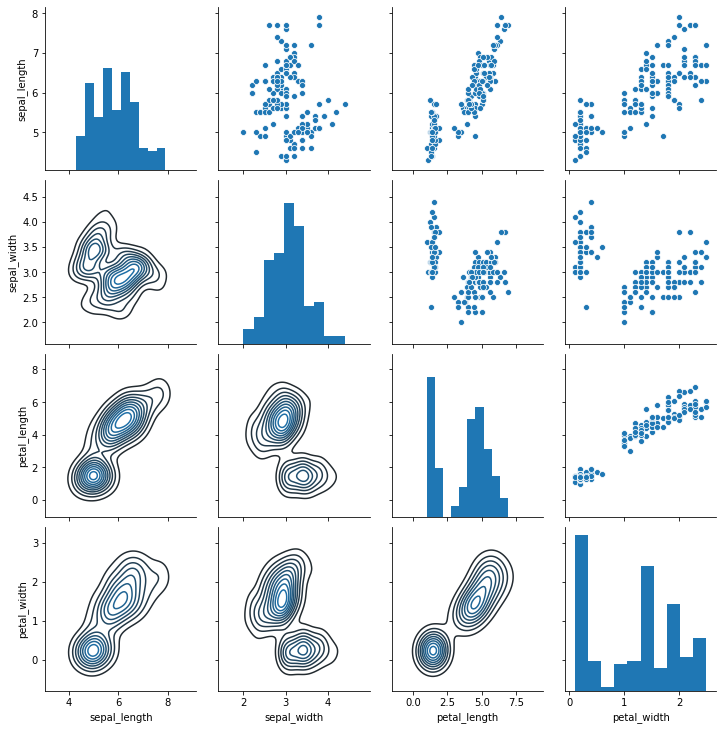

In [22]:
g = sns.PairGrid(iris)
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(plt.hist)

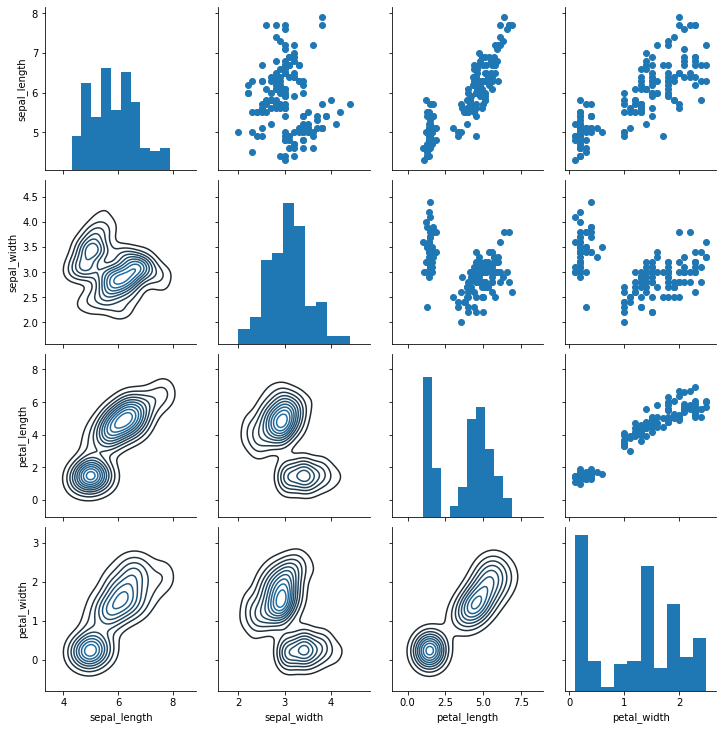

In [6]:
# Map to upper,lower, and diagonal

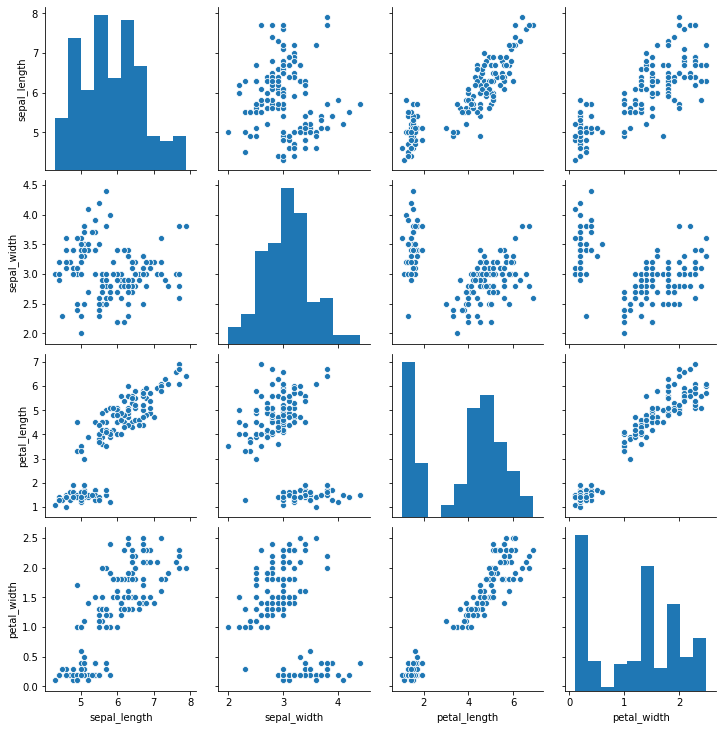

In [7]:
# Pairplot is simpler version of Pairgrid
sns.pairplot(iris)

# Facet Grid

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


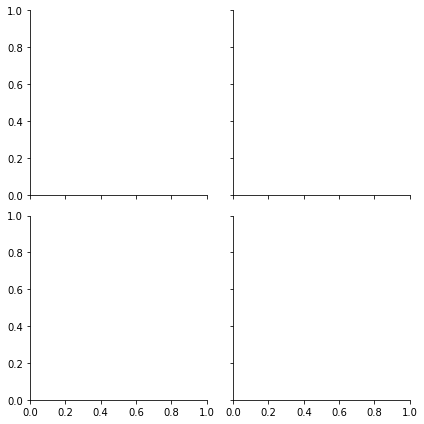

In [31]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row='smoker',col="time")

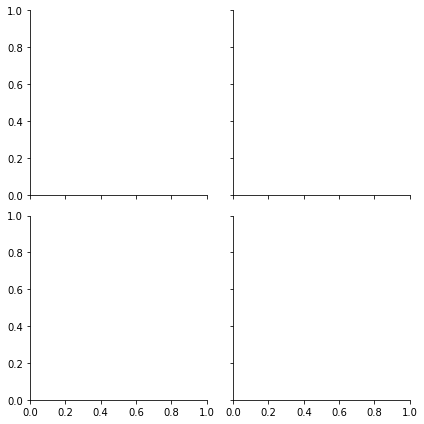

In [10]:
# Just the Grid

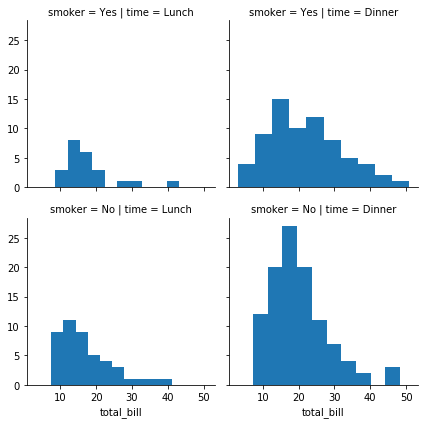

In [33]:
g = sns.FacetGrid(tips, row='smoker',col="time")
g.map(plt.hist, "total_bill")

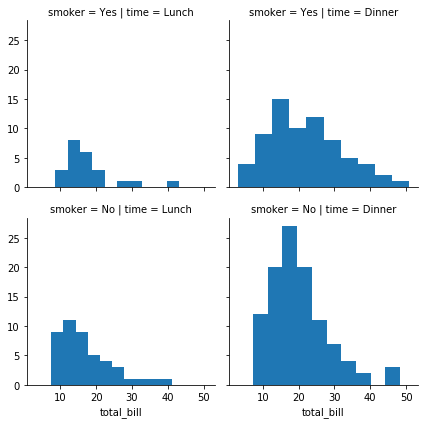

In [11]:
# map the grid

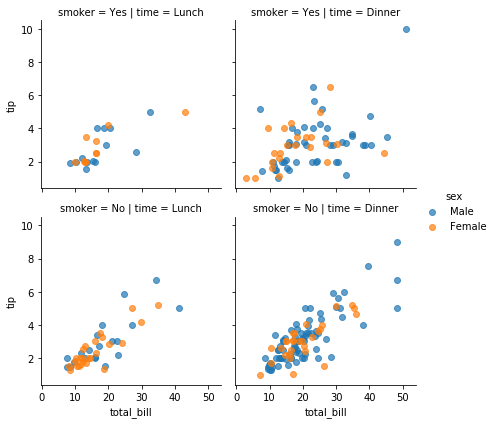

In [41]:
g = sns.FacetGrid(tips, row='smoker',col="time",hue='sex')
g.map(plt.scatter, "total_bill", 'tip', alpha = 0.7)
g.add_legend()

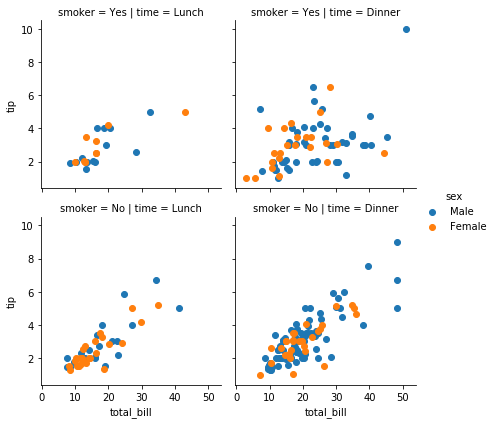

# JointGrid

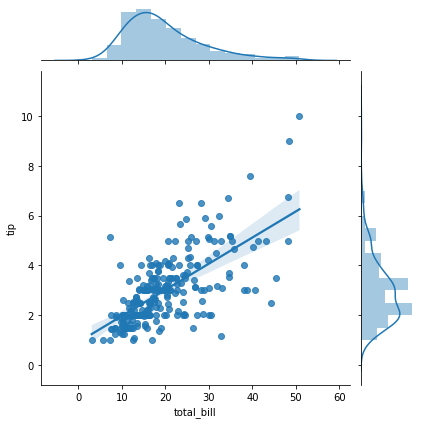

In [42]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

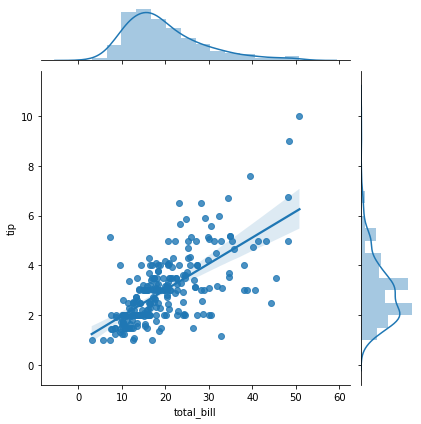

In [14]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

___
# Matrix Plots
Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [43]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [52]:
corrMatrix=tips.corr()
corrMatrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [18]:
# Matrix form for correlation data

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


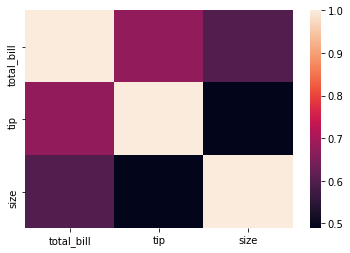

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(tips.corr());

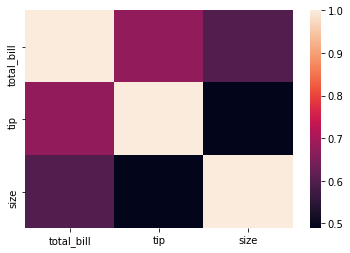

In [19]:
# Heatmap of correlation data

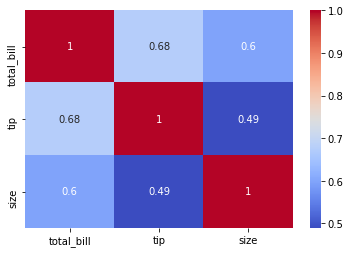

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(tips.corr(), annot=True, cmap='coolwarm');

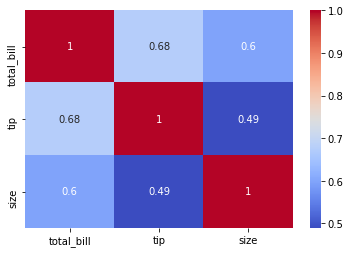

In [20]:
# cmap = 'coolwarm', also enable annotation

In [59]:
import pandas as pd

flights = sns.load_dataset('flights')
df = pd.pivot_table(flights, values='passengers',columns='year', index='month')
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [23]:
# Create a pivot table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


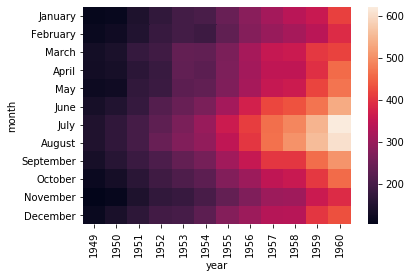

In [61]:
sns.heatmap(df);

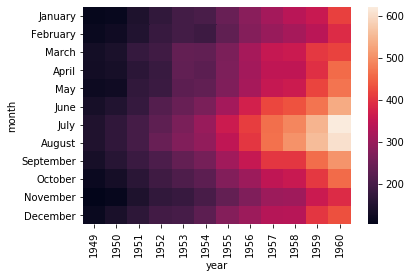

In [24]:
# Visualize the pivot table using a heatmap

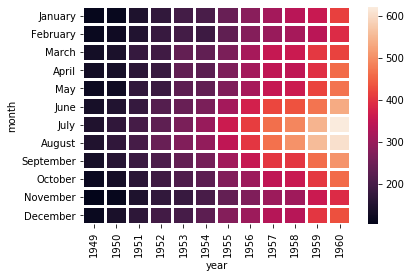

In [62]:
sns.heatmap(df,linewidths=2, linecolor='white')

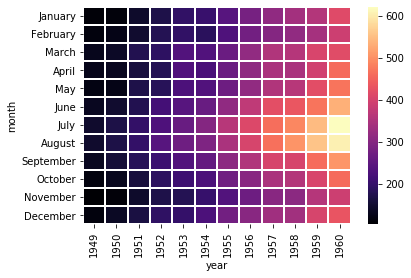

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.

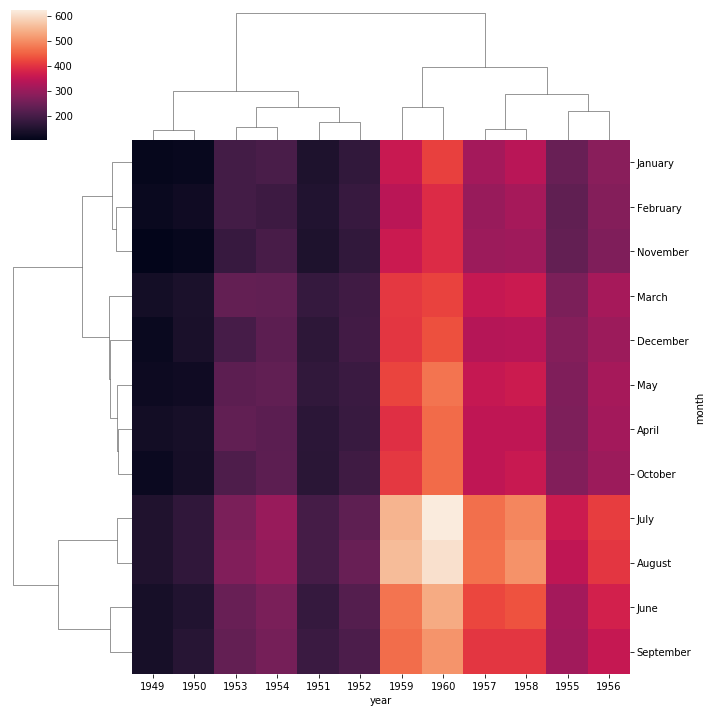

In [63]:
sns.clustermap(df)


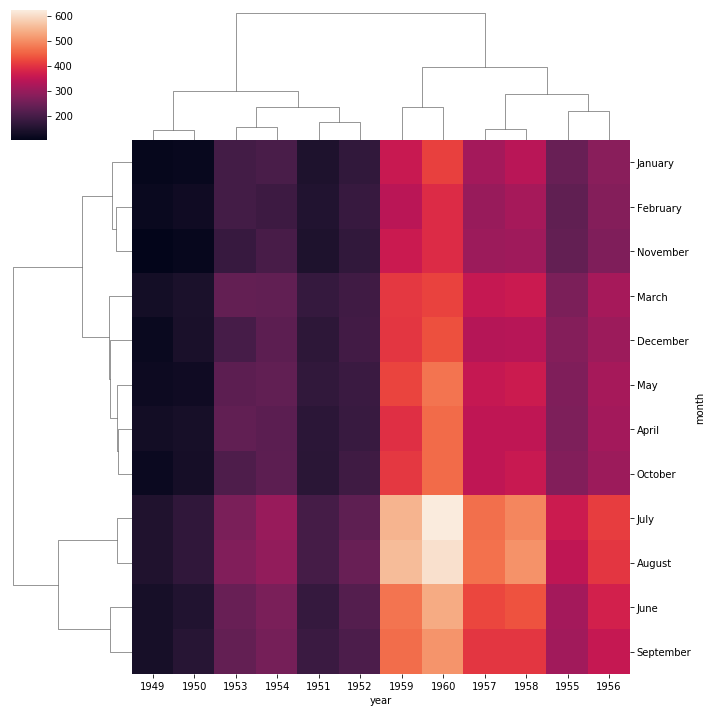

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# lmplot()

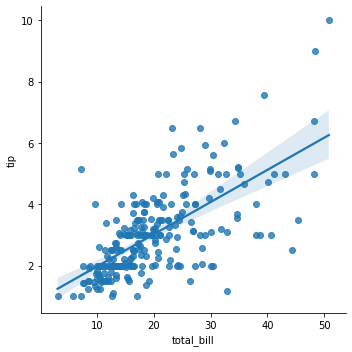

In [67]:
sns.lmplot(x ='total_bill', y ='tip', data = tips)

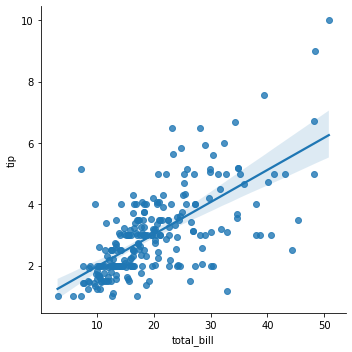

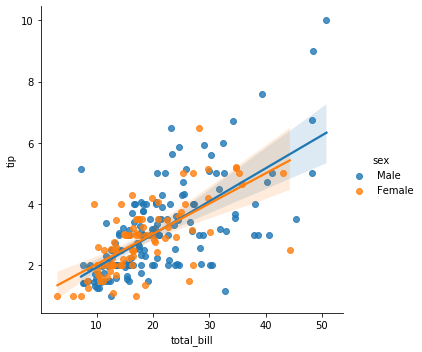

In [69]:
sns.lmplot(x ='total_bill', y ='tip', hue='sex',data = tips)

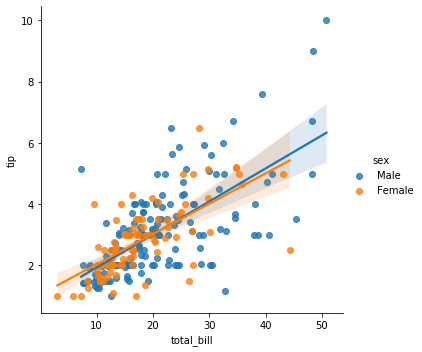

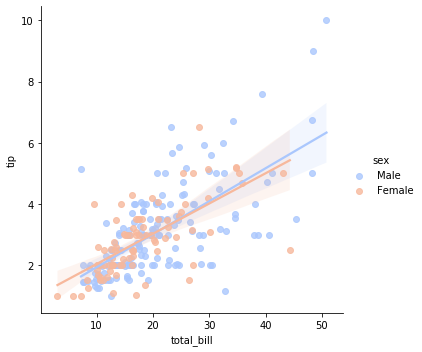

In [70]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

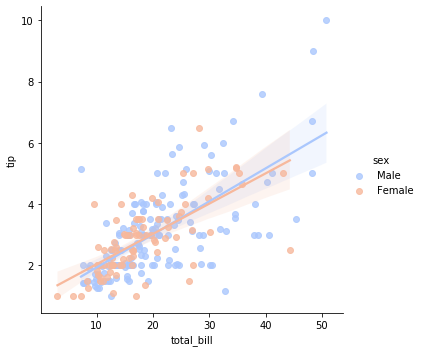

In [30]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

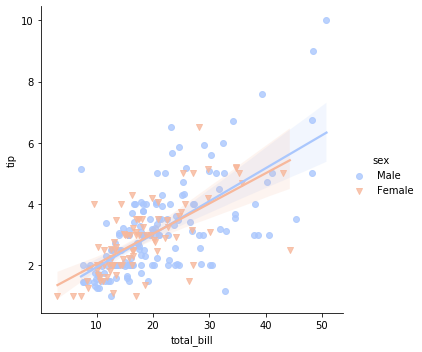

In [71]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm', markers =['o', 'v'])

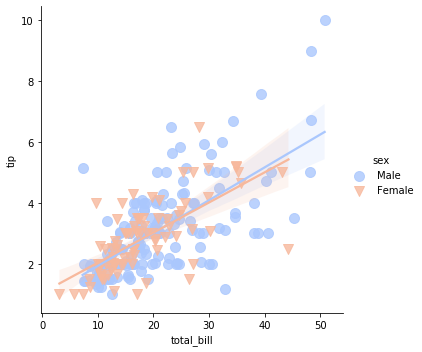

In [31]:
# http://matplotlib.org/api/markers_api.html

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

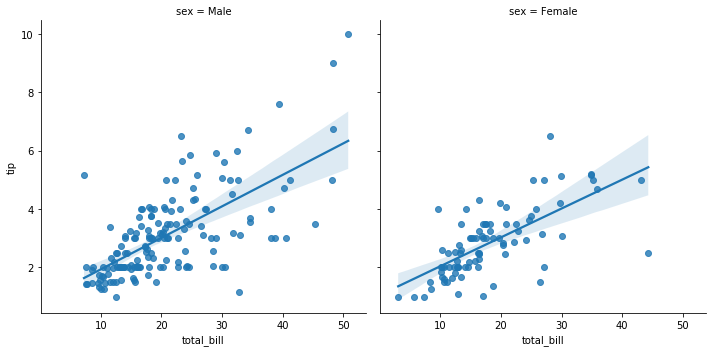

In [75]:
sns.lmplot(x ='total_bill', y ='tip', data = tips, col ='sex', palette ='coolwarm') 

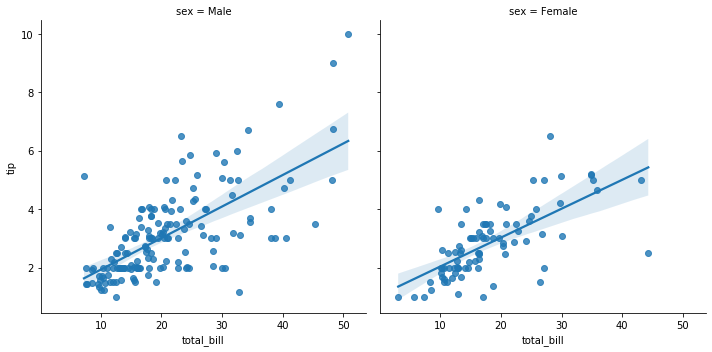

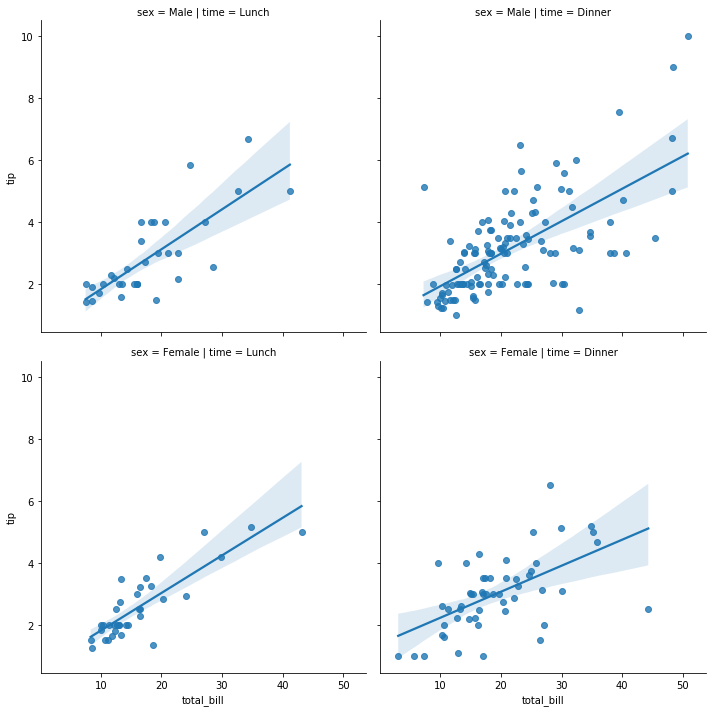

In [79]:
sns.lmplot(x ='total_bill', y ='tip', data = tips, row ='sex', col='time') 

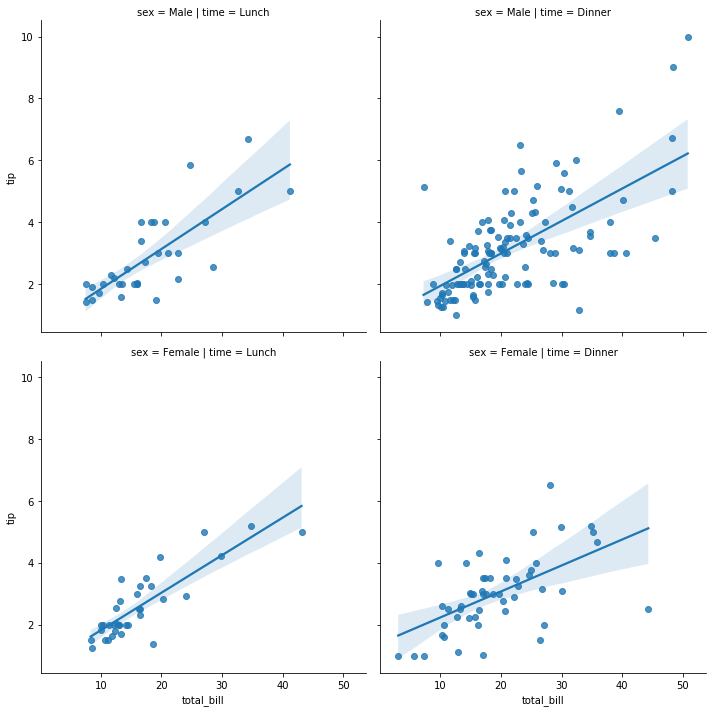

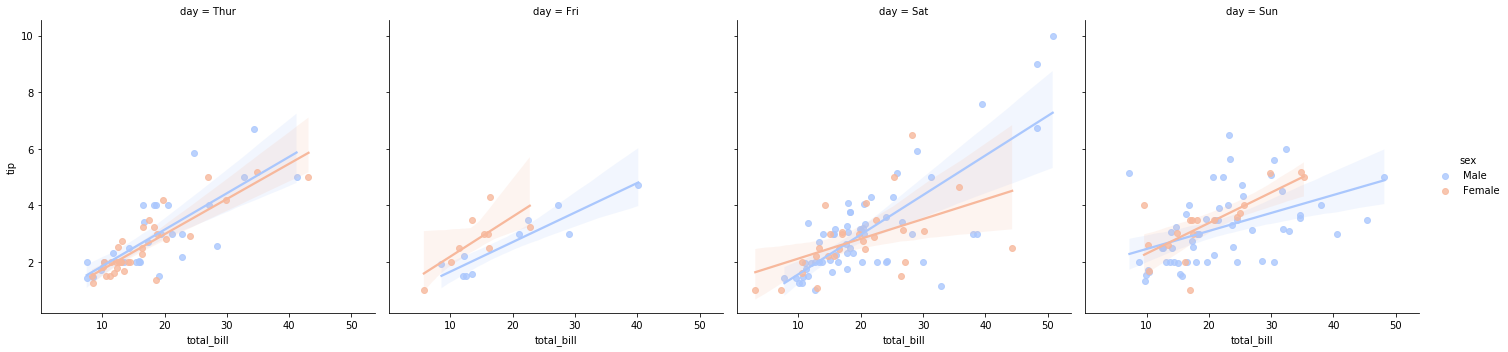

In [81]:
sns.lmplot(x ='total_bill', y ='tip', data = tips, col ='day', hue='sex', palette='coolwarm') 

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

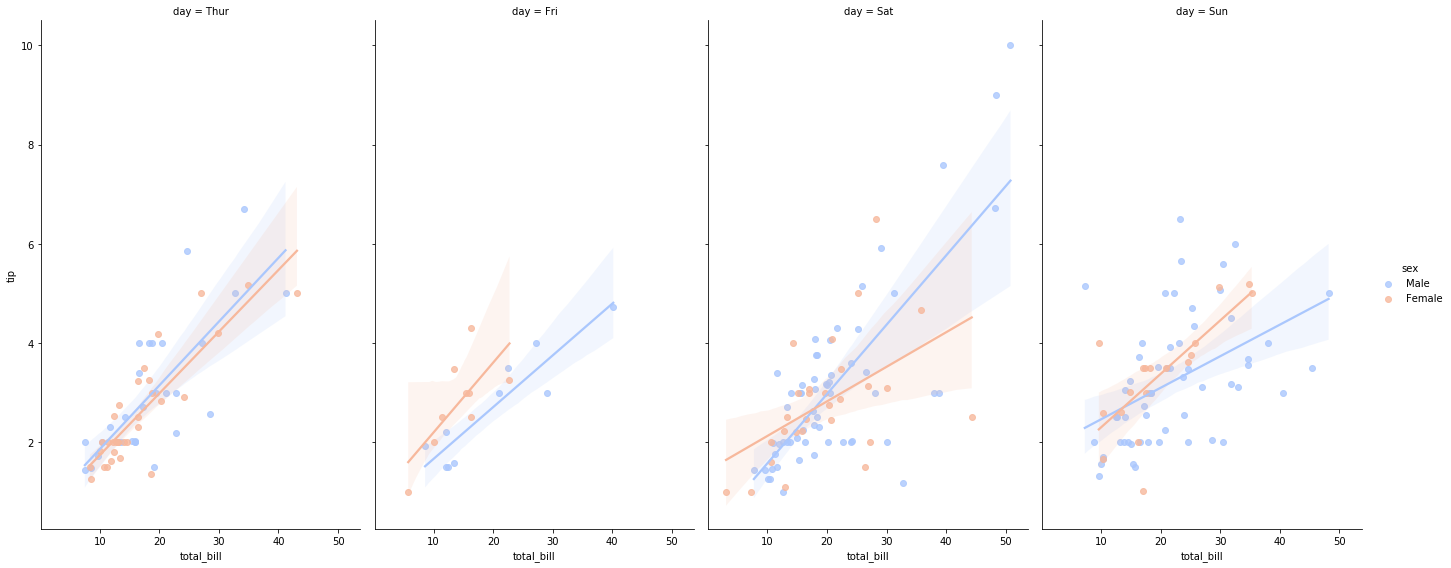

# That's all for seaborn for now..